In [5]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

def as_frame(database, sql):
    cursor = db.cursor()

    results = cursor.execute(sql)

    names = [desc[0] for desc in cursor.description]

    frame = pd.DataFrame(results.fetchall(), columns=names)
    
    return frame

db = sql.connect("commodity.db")

sql = "select * from time_series;"

data = as_frame(db, sql)

data

,year,name,price,price_unit,yield,area,production
0,1991,Cassava,2066.0,LCU,101936.0,2551000.0,26004000.0
1,1992,Cassava,2340.0,LCU,105931.0,2755000.0,29184000.0
2,1993,Cassava,4640.0,LCU,105935.0,2844000.0,30128000.0
3,1994,Cassava,4450.0,LCU,105928.0,2927000.0,31005000.0
4,1995,Cassava,6610.0,LCU,106671.0,2944000.0,31404000.0
5,1996,Cassava,10570.0,LCU,106646.0,2946000.0,31418000.0
6,1997,Cassava,11860.0,LCU,118818.0,2697400.0,32050000.0
7,1998,Cassava,11510.0,LCU,107461.0,3042500.0,32695000.0
8,1999,Cassava,13620.0,LCU,95998.0,3406000.0,32697000.0
9,2001,Cassava,18300.0,LCU,96012.0,3340000.0,32068000.0


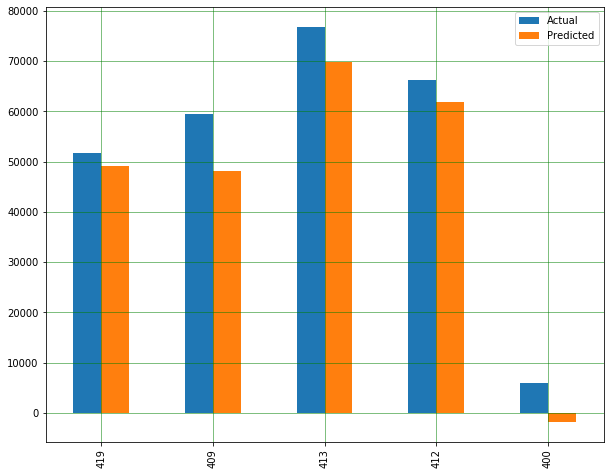

Mean Absolute Error: 6634.820399848206
Mean Squared Error: 53421138.28206321
Root Mean Squared Error: 7308.976555035815


0.9108217980853509

In [6]:
# we select only yam data for regression and neural network tests
data_yam = data.loc[data["name"] =="Yams"]
data_yam
yam_X = data_yam[["yield", "area", "production"]]
yam_y = data_yam["price"]
data_yam.describe()

# We split the data into training and testing data sets and aftewards fit to a linear regressor
X_train, X_test, y_train, y_test = train_test_split(yam_X, yam_y, test_size=0.2, random_state=0)


# we scale the features so that all of them can be uniformly evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# we fit the data to a linear model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# We show the coefficients of the regression
coeff_df = pd.DataFrame(regressor.coef_, yam_X.columns, columns=['Coefficient'])  
coeff_df

# We predict the test dataset
y_pred = regressor.predict(X_test)
y_pred 

# This shows a table of how the actual values compare with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

# We create a visualization of the comparism between the actual and predicted prices
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# We estimate the regression error using the metrics below
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# This shows the R square value of the regression
regressor.score(X_test, y_test)

Mean Absolute Error: 8520.425446687577
Mean Squared Error: 91506395.14356075
Root Mean Squared Error: 9565.897508522698


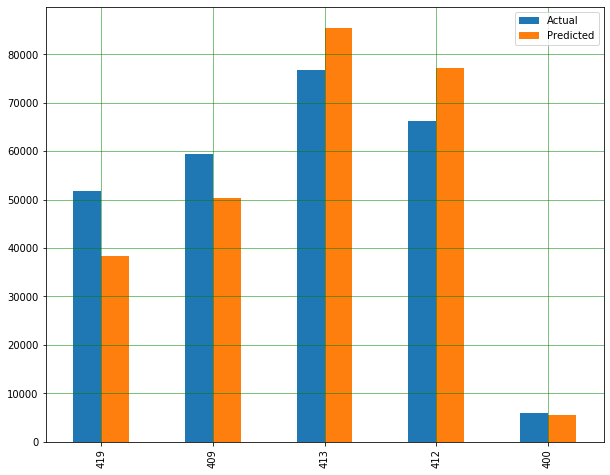

In [7]:
# we train the neural network using the multilayer perceptron regressor
mlp = MLPRegressor(random_state=0, activation='relu', max_iter=200, hidden_layer_sizes=(64,64), solver="lbfgs")

#mlp = MLPRegressor(random_state=0, activation='tanh', hidden_layer_sizes=(16,8))

# we fit the data to the neural network
mlp.fit(X_train, y_train)

# we scale the features so that all of them can be uniformly evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# We predict the test dataset
y_guess = mlp.predict(X_test)

# We estimate the regression error using the metrics below
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_guess))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_guess))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_guess)))

# This shows a table of how the actual values compare with the predicted values
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_guess})
df2

# We create a visualization of the comparism between the actual and predicted prices
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [2]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, y_guess))
print(classification_report(y_test, y_guess))

NameError: name 'y_train' is not defined